In [1]:
import os

In [2]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Georgia']})
rc('text', usetex=True)

In [3]:
from helper import *
from utils import *
from approximation import *
from plot import *

In [4]:
data_dir = '/Users/linggeli/monte_carlo/data/'
contour_type = 'theta23__dmsq_32_NH'
contour_dist = load_contour_dist_2d(os.path.join(data_dir, 'fc2/{}/contour'.format(contour_type)), 40, 2000)
contour_stat = load_contour_stat_2d(os.path.join(data_dir, 'test_contours/{}/fit_5.txt'.format(contour_type)), 20)
contour_dist = contour_dist[::2, ::2, :]

In [5]:
print(contour_dist.shape)
print(contour_stat.shape)

(20, 20, 2000)
(20, 20)


In [6]:
contour_tile = calculate_percentile_2d(contour_dist, contour_stat)  # p-value at every point

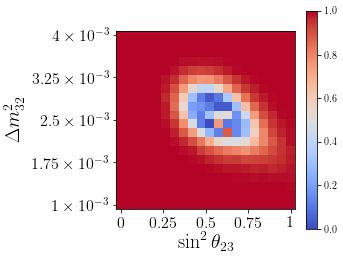

In [7]:
fig = plt.figure(figsize=(4, 4))
im = plt.imshow(np.flip(contour_tile, axis=0), cmap='coolwarm', interpolation='nearest')
plt.colorbar(im)
plot_axis(contour_type, 19)
plt.show()

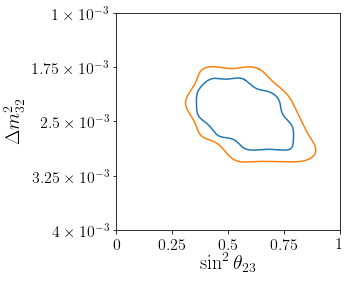

In [8]:
fig = plt.figure(figsize=(4, 4))
plot_smooth_contour(contour_tile < 0.68)
plot_smooth_contour(contour_tile < 0.9)
plot_axis(contour_type, 19)
plt.show()

In [9]:
all_points, all_samples = flatten_dist(contour_dist)
all_obs = contour_stat.flatten()

In [10]:
n_mc = 0
total = 20 * 20 * 2000
priority = np.random.uniform(size=400)
sample_size = np.zeros(400)

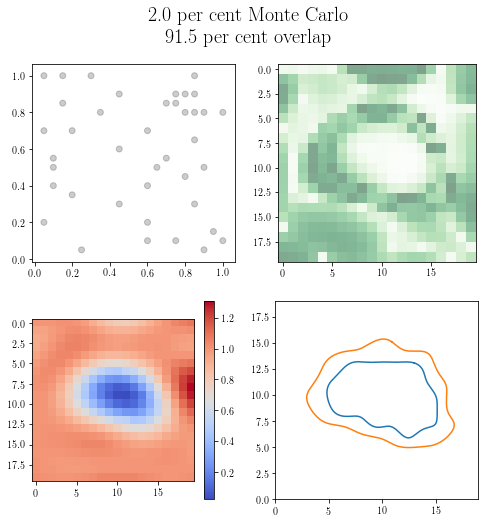

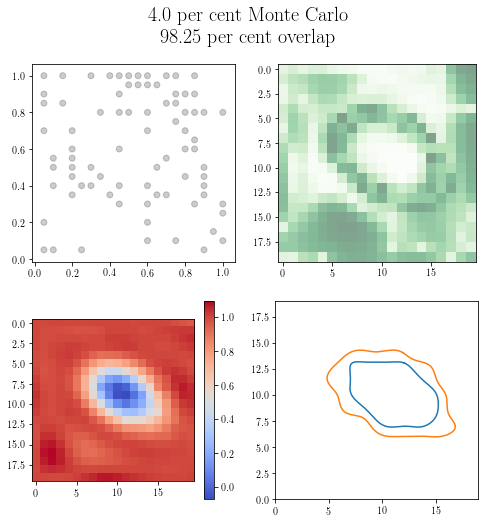

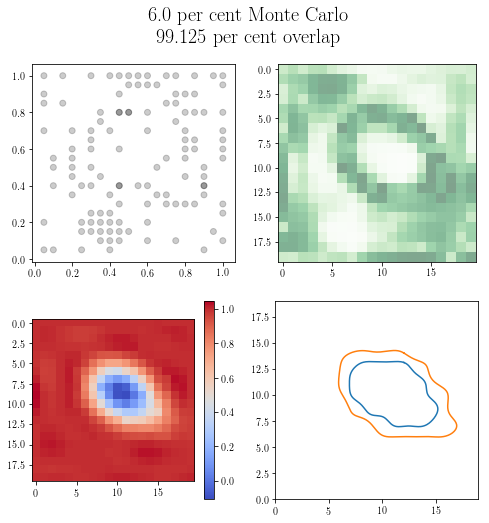

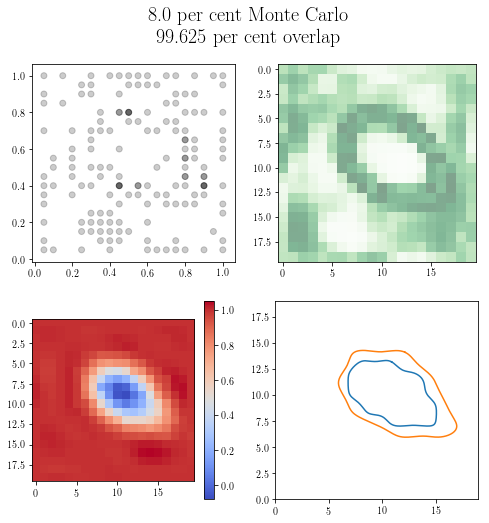

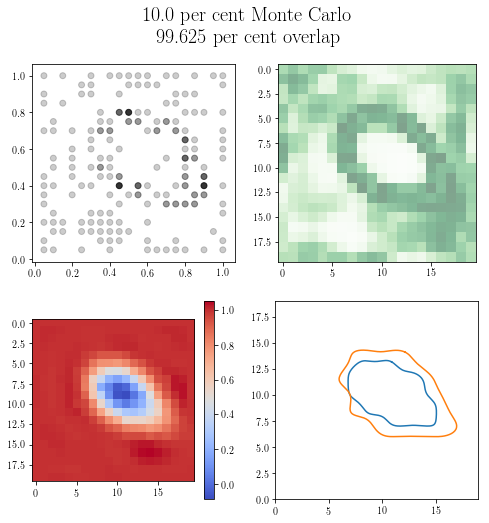

In [11]:
for run in range(5):
    n_mc += 40 * 400
    
    sample_size = expand_sample(priority, sample_size, 40, 400, 2000)
    current_points = get_current_training(all_points, sample_size)
    current_target, current_error = get_current_target(all_samples, all_obs, sample_size)
    hat, std = build_approximation(current_points, current_target, current_error, all_points)
    priority = acquisition_function(hat, std)
    
    hat[sample_size > 0] = current_target
    hat_grid = data_to_grid(hat, 20)
    
    overlap = calculate_overlap(hat_grid, contour_tile)
    
    priority_grid = data_to_grid(np.argsort(np.argsort(priority)) * 100.0 / (priority.shape[0] - 1), 20)

    plot_iteration(sample_size, all_points, priority_grid, hat_grid)    
    
    plt.suptitle('{} per cent Monte Carlo\n'.format(n_mc * 100.0 / total) + 
                 '{} per cent overlap'.format(np.round(overlap * 100, 3)), fontsize=20)
    #plt.savefig('final{}.png'.format(run), dpi=200)
    plt.show()